In [4]:
from helpers import *
coalitions = {
"52": ["2022-07-18", "2023-03-14"],
"51": ["2021-01-26", "2022-07-17"],
"50": ["2019-04-29", "2021-01-25"],
"49": ["2016-11-23", "2019-04-28"],
"48": ["2015-04-09", "2016-11-22"],
"47": ["2014-03-26", "2015-04-08"]
}

In [5]:
selectedCoalition = "52"
selectedCoalitionFolder = f"coalition_{selectedCoalition}"

In [6]:
sessionData = get_session_data(selectedCoalition)
coalitionVotesDf = get_coalition_votes(sessionData, selectedCoalition)
adjacencyMatrixDf = get_adjacency_matrix_df(coalitionVotesDf)
# TODO: create name_to_party so that I can colour later

Session data already exists in coalition_52/sessionData.parquet
Votes df found in coalition_52/votes.parquet


In [7]:
uniqueVoteTypes = set([item for sublist in list(coalitionVotesDf[s].unique() for s in coalitionVotesDf.columns) for item in sublist if item == item])

In [8]:
uniqueVoteTypes

{'EI_HAALETANUD', 'ERAPOOLETU', None, 'POOLT', 'PUUDUB', 'VASTU'}

<AxesSubplot:>

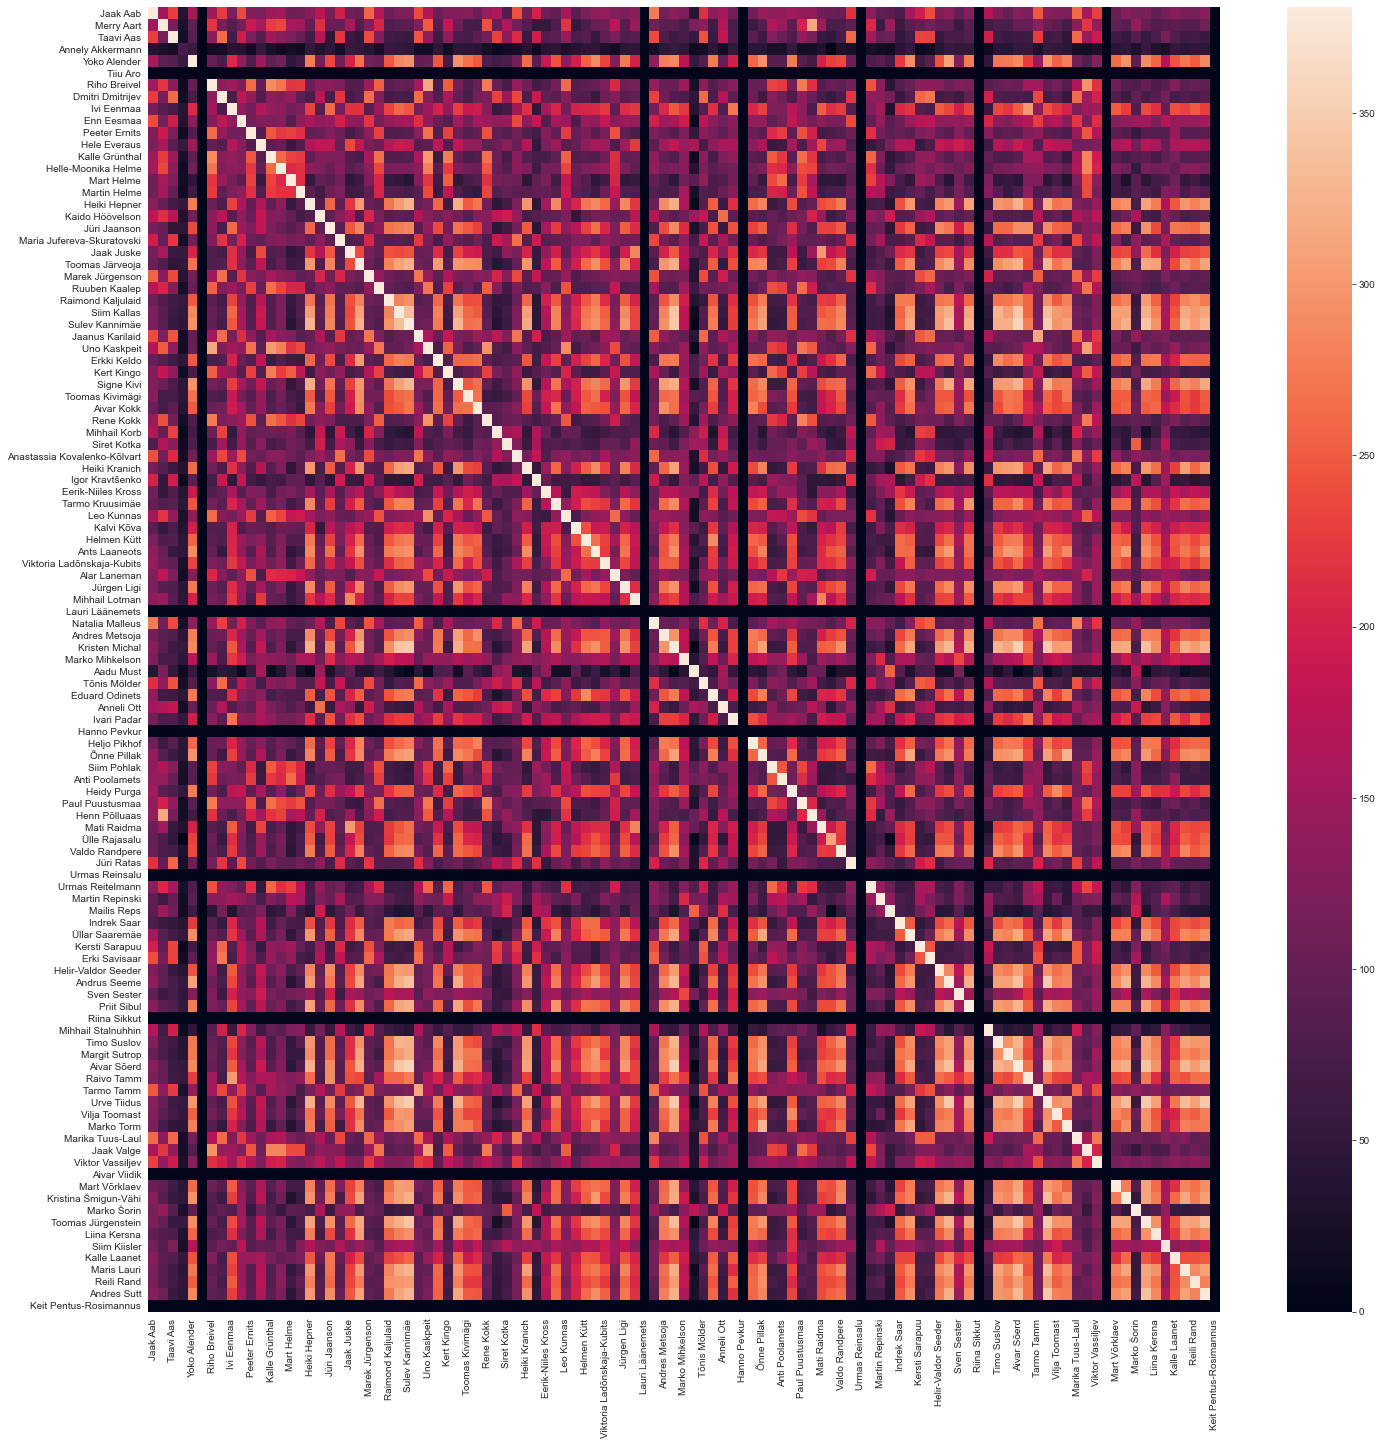

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (24, 24)
sns.heatmap(adjacencyMatrixDf)

In [10]:
import networkx as nx

In [11]:
G = nx.from_pandas_adjacency(adjacencyMatrixDf)

In [17]:
edge_attrs = nx.get_edge_attributes(G, "weight")
edge_attrs = {k:v for k, v in edge_attrs.items() if k[0] != k[1]} # remove reflexive
edge_attrs = pd.Series(edge_attrs) # 
edge_attrs /= edge_attrs.max() # scale to max
# filter 
#selected_edges = edge_attrs[edge_attrs > 0.8] # maybe top5 for each?
selected_edges = edge_attrs.reset_index().groupby("level_0").head(4).set_index(["level_0", "level_1"]).rename({0: "value"}).squeeze()

In [30]:
import math

In [33]:
#pos = nx.drawing.layout.kamada_kawai_layout(G)
#pos = nx.drawing.layout.shell_layout(G)
pos = nx.drawing.layout.spring_layout(G, k=5/math.sqrt(len(G.nodes)))

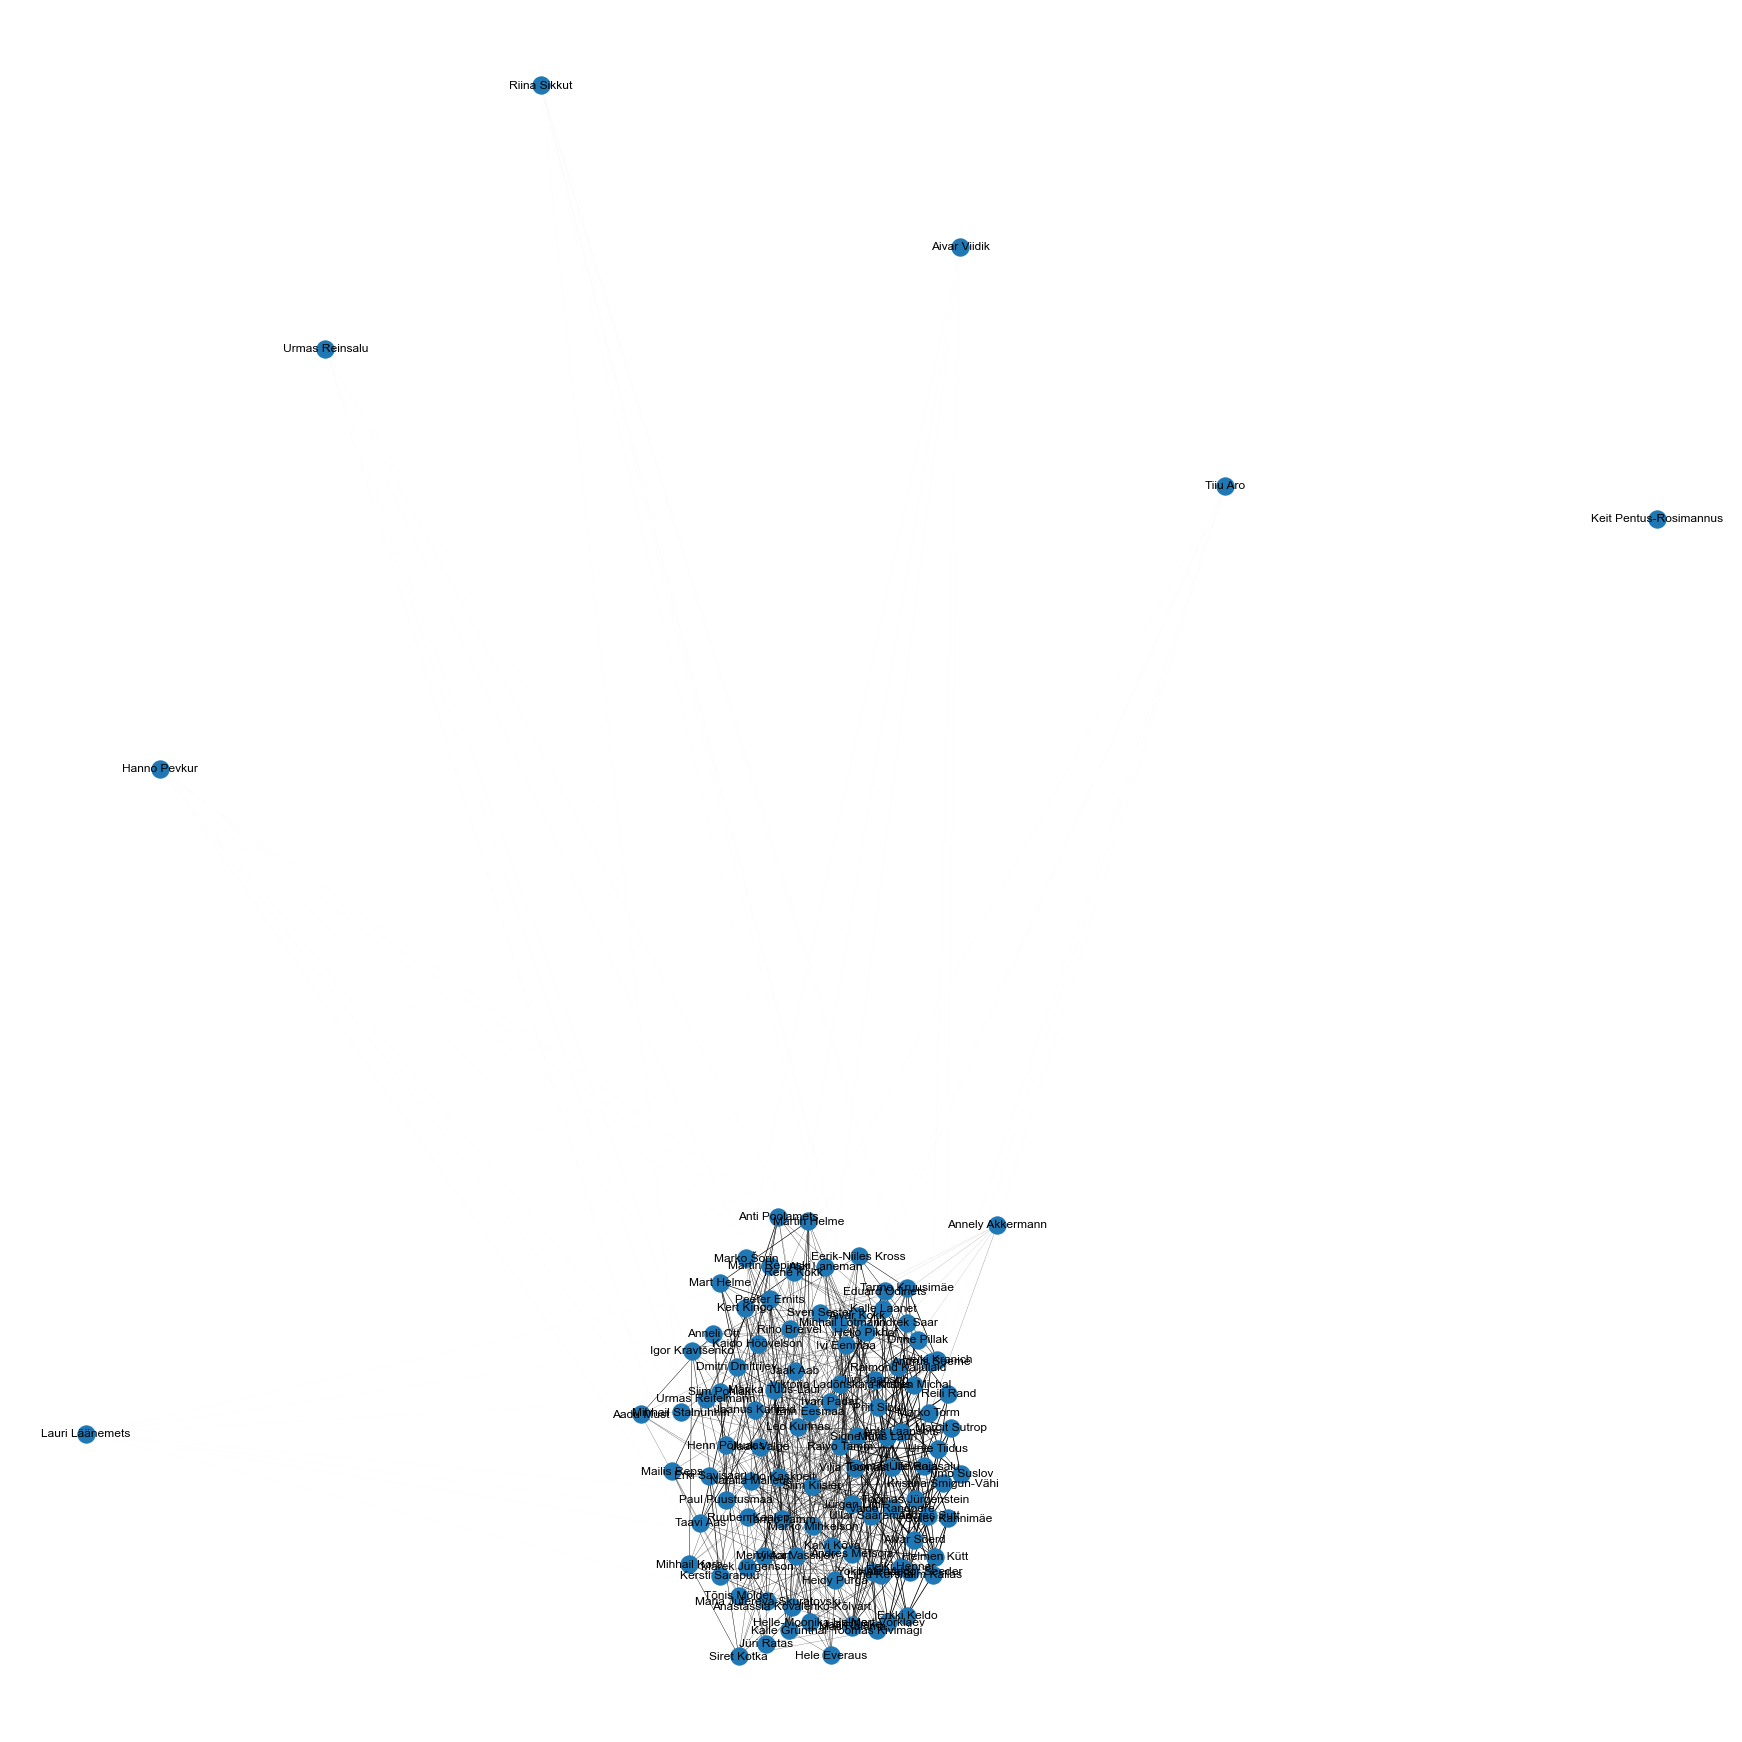

In [34]:
nx.draw(G, pos=pos, with_labels=True, edgelist=selected_edges.index, width=selected_edges.values)